In [1]:
!nvidia-smi

Sat May  4 11:16:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
#Установка YOLOv8
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
# Большой датасет
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Y032I3p4uOSLgNsKSkyH")
project = rf.workspace("meredith-lo-pmqx7").project("asl-project")
version = project.version(17)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ASL-Project-17 in yolov8:: 100%|██████████| 22722/22722 [00:06<00:00, 3461.31it/s]


In [7]:
!rm -rf /content/runs

In [8]:
# Обучение на наборе данных жестов
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/ASL-Project-17/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=F

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1714821852.b031079d39b6.2825.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch17340.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch17341.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch17342.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


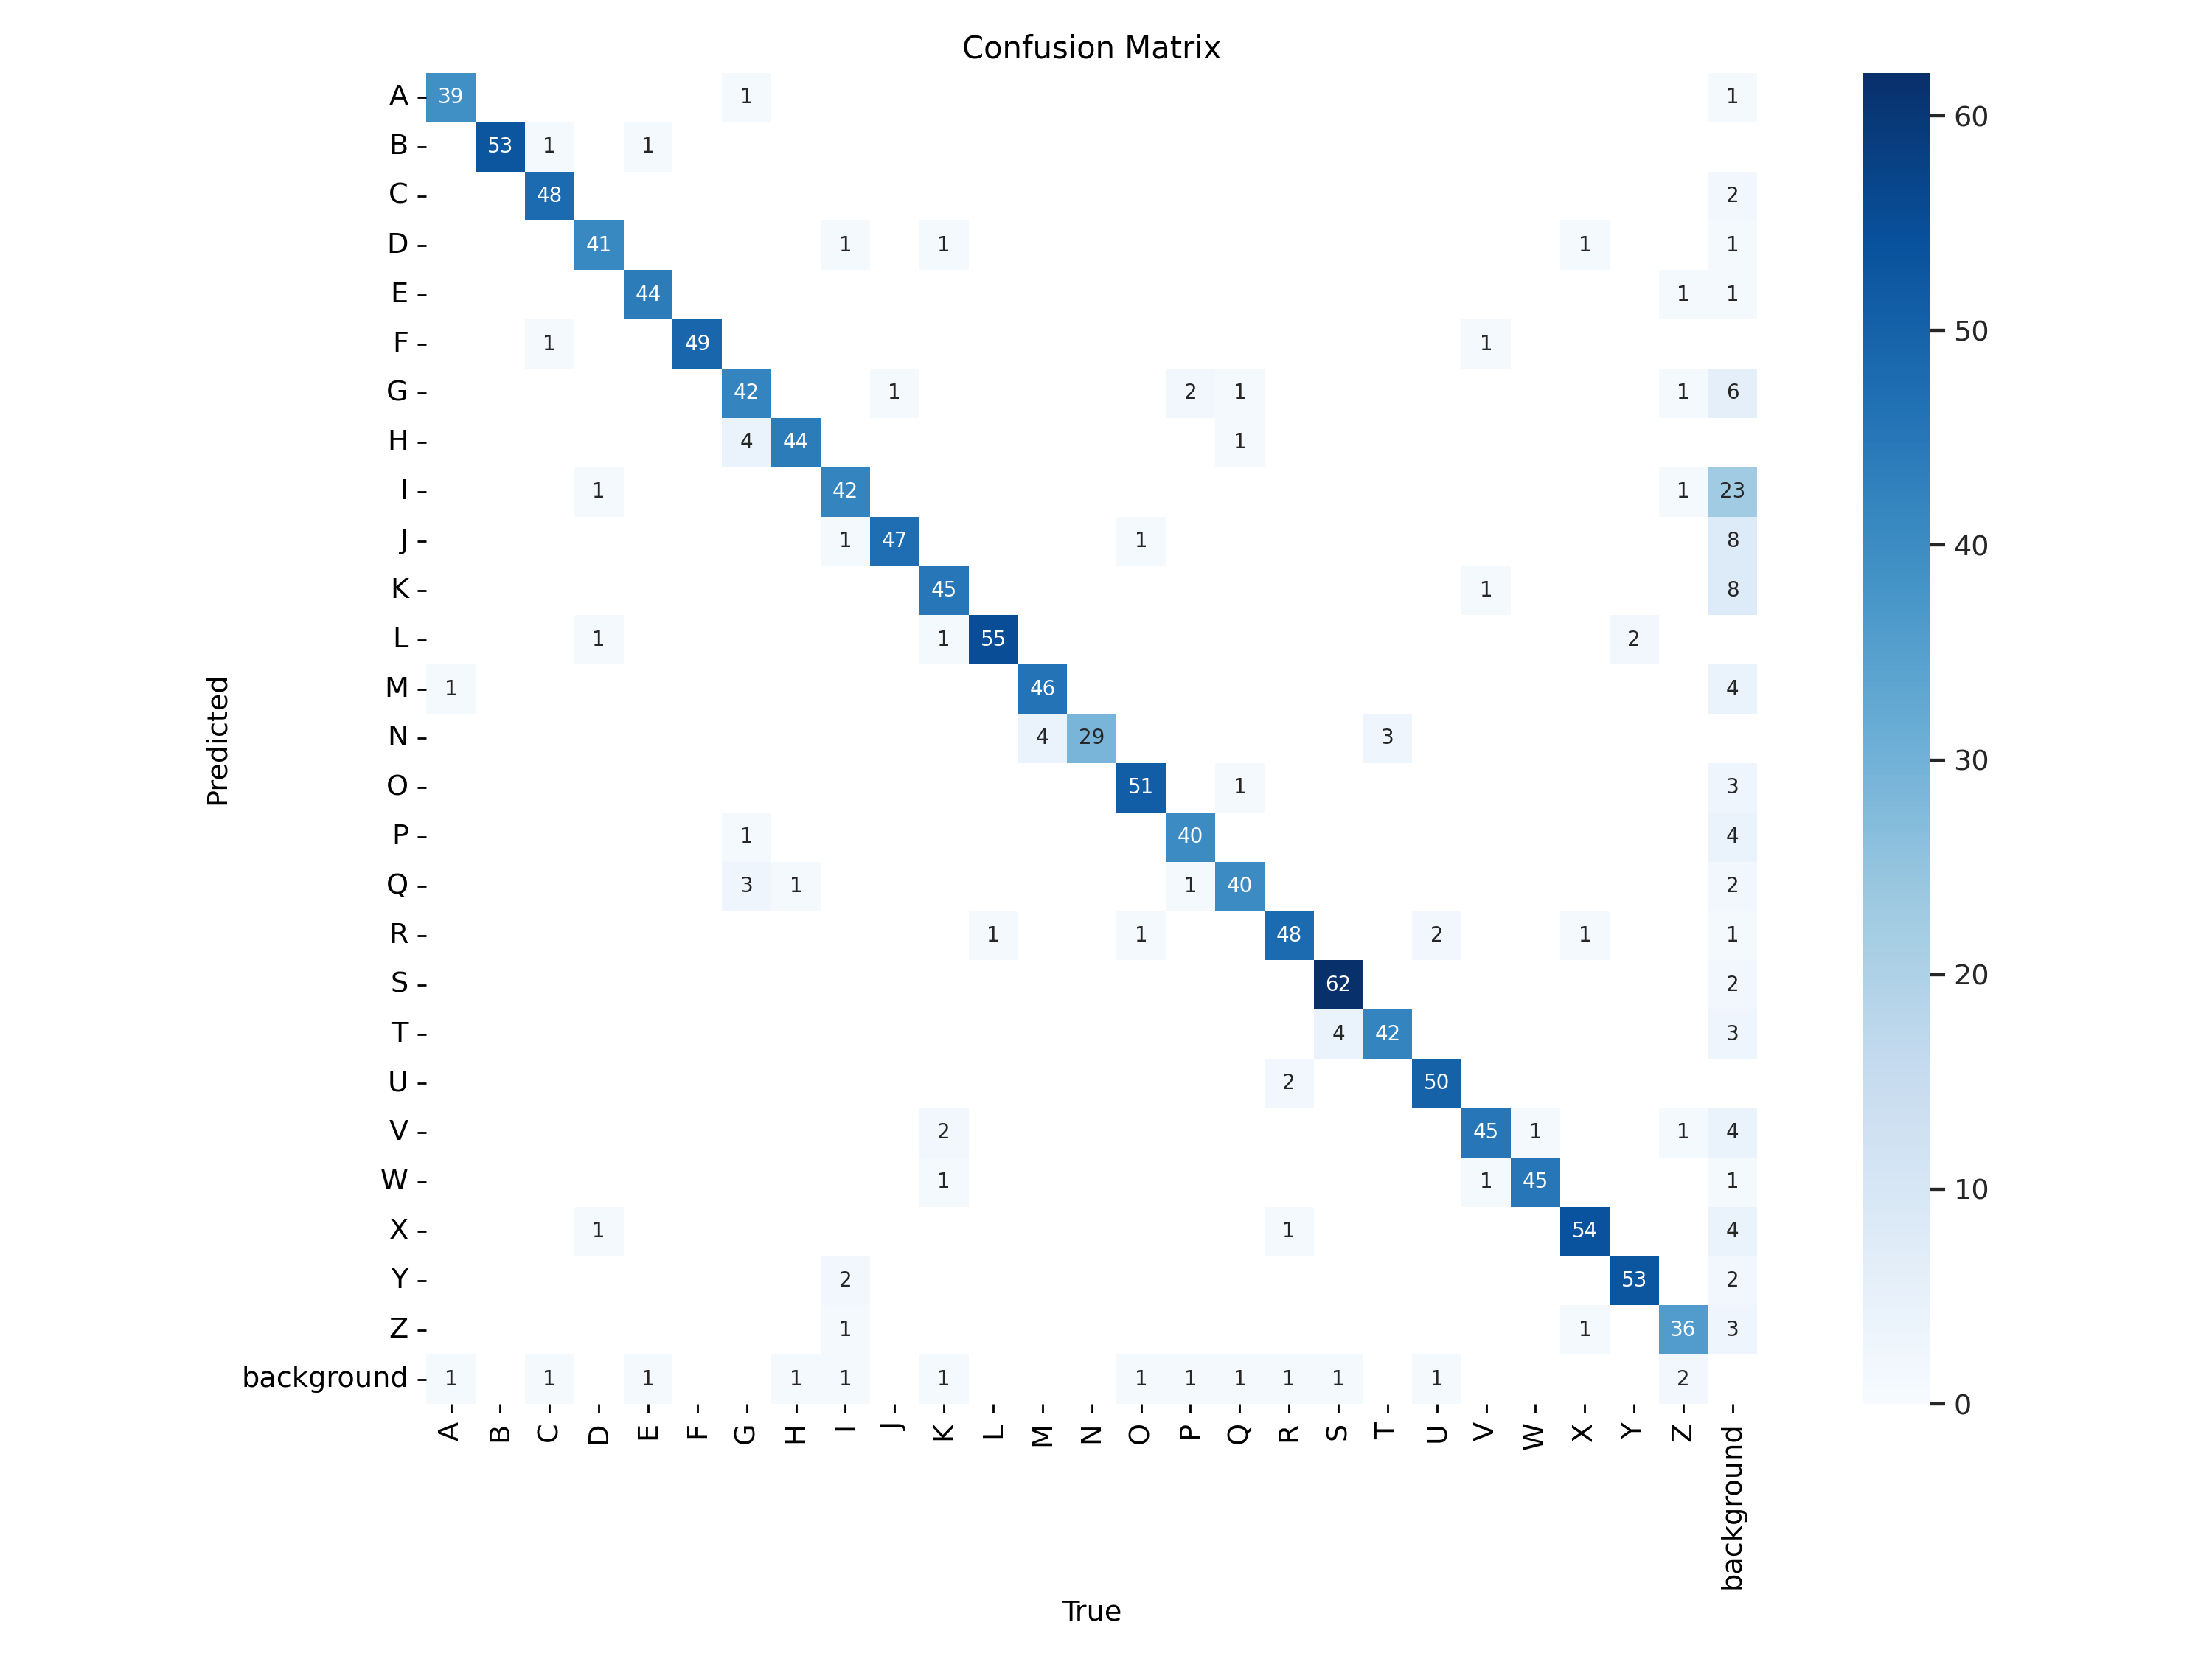

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


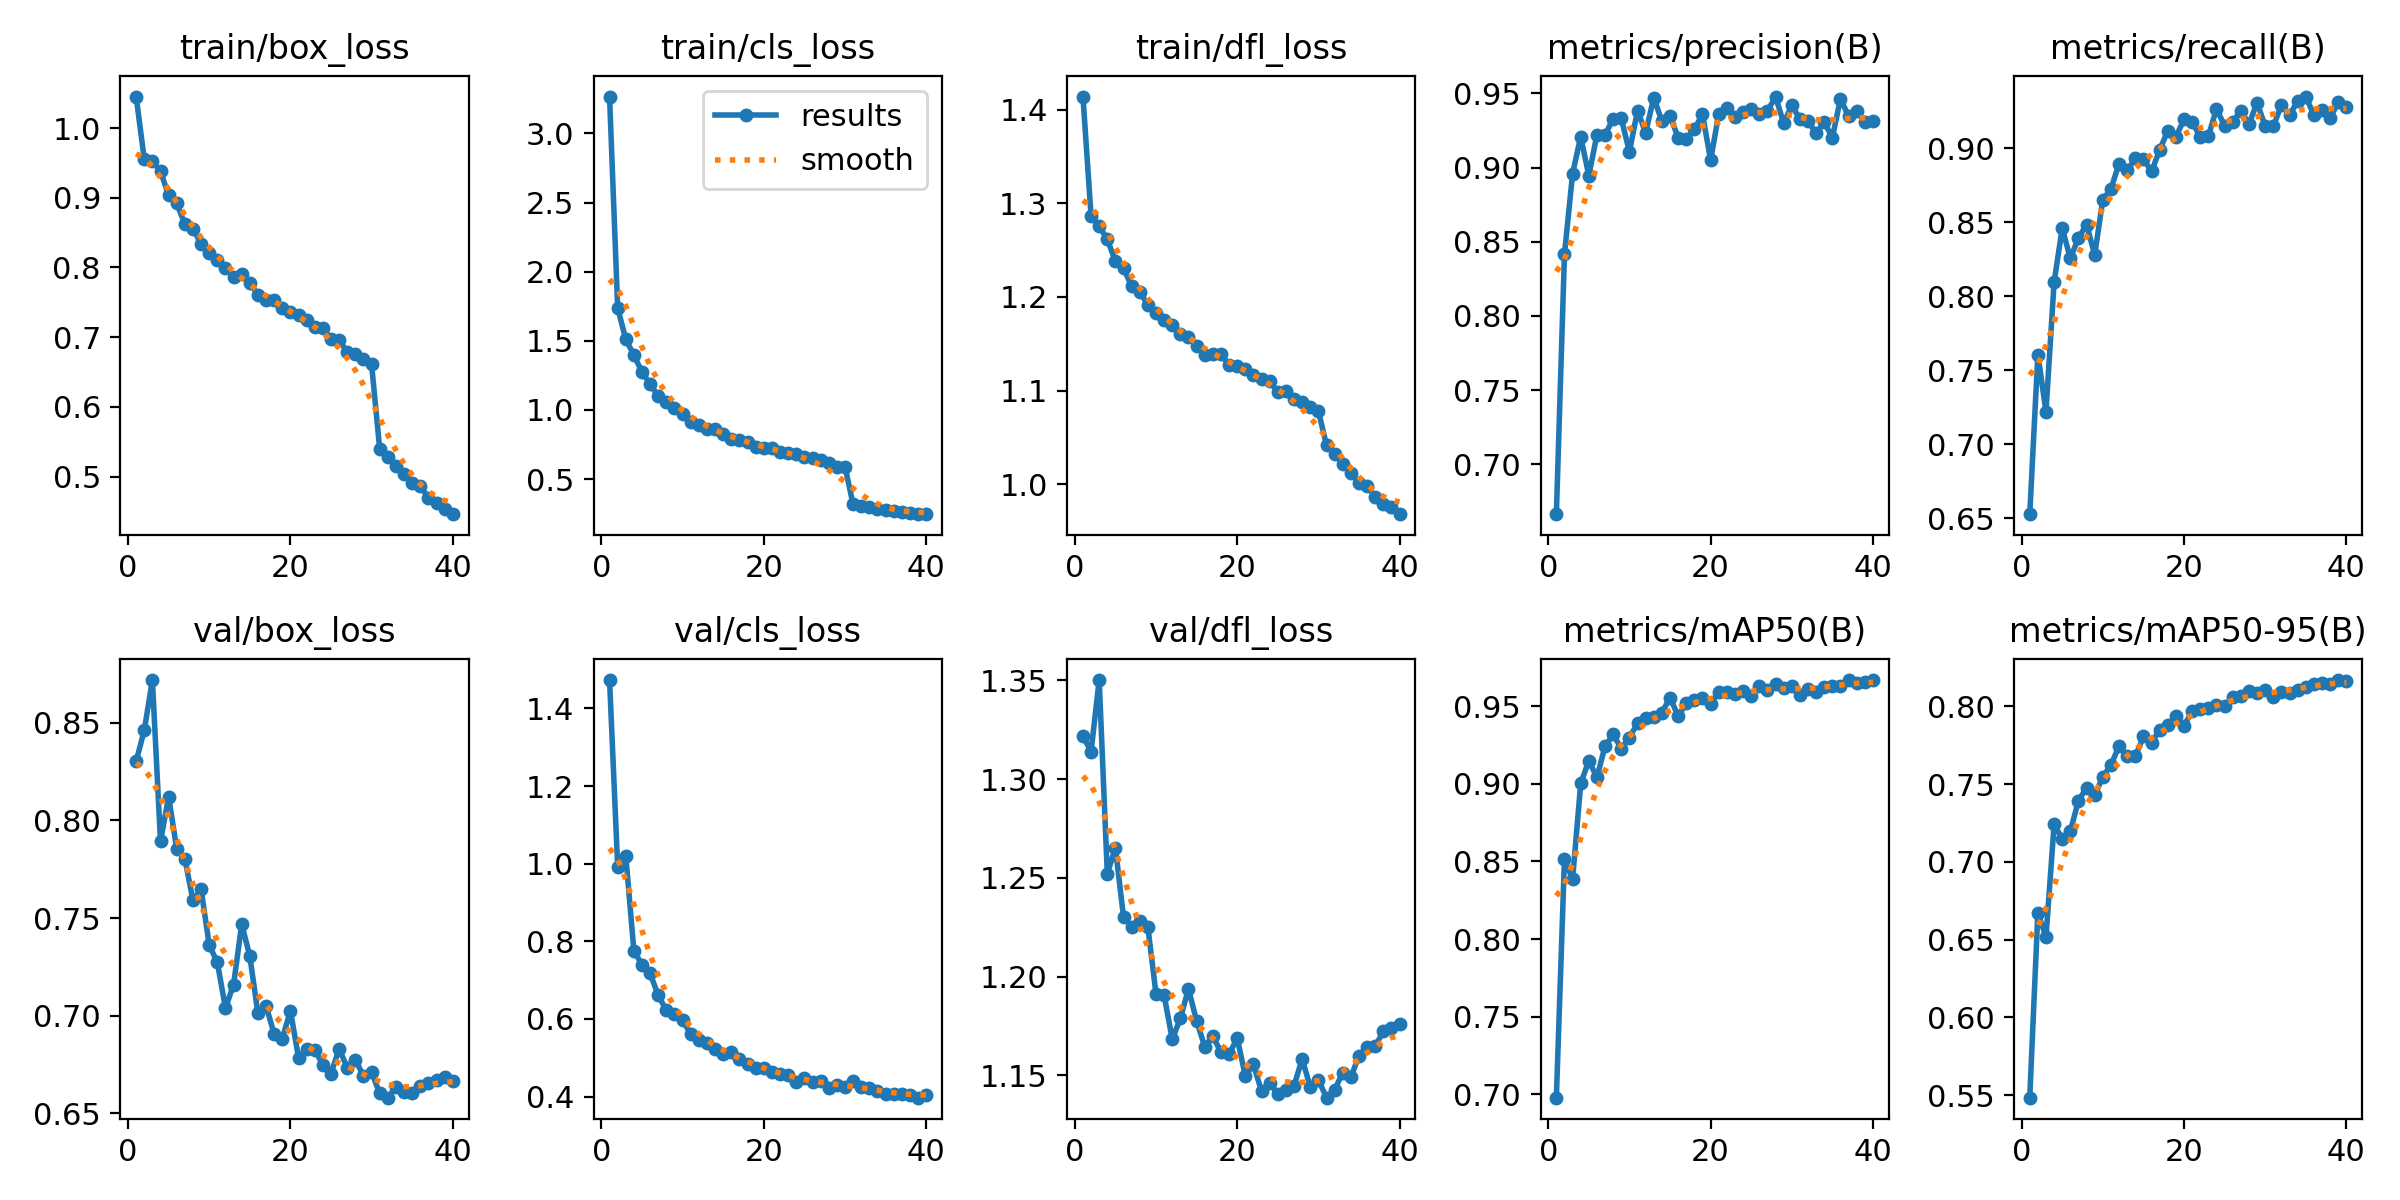

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


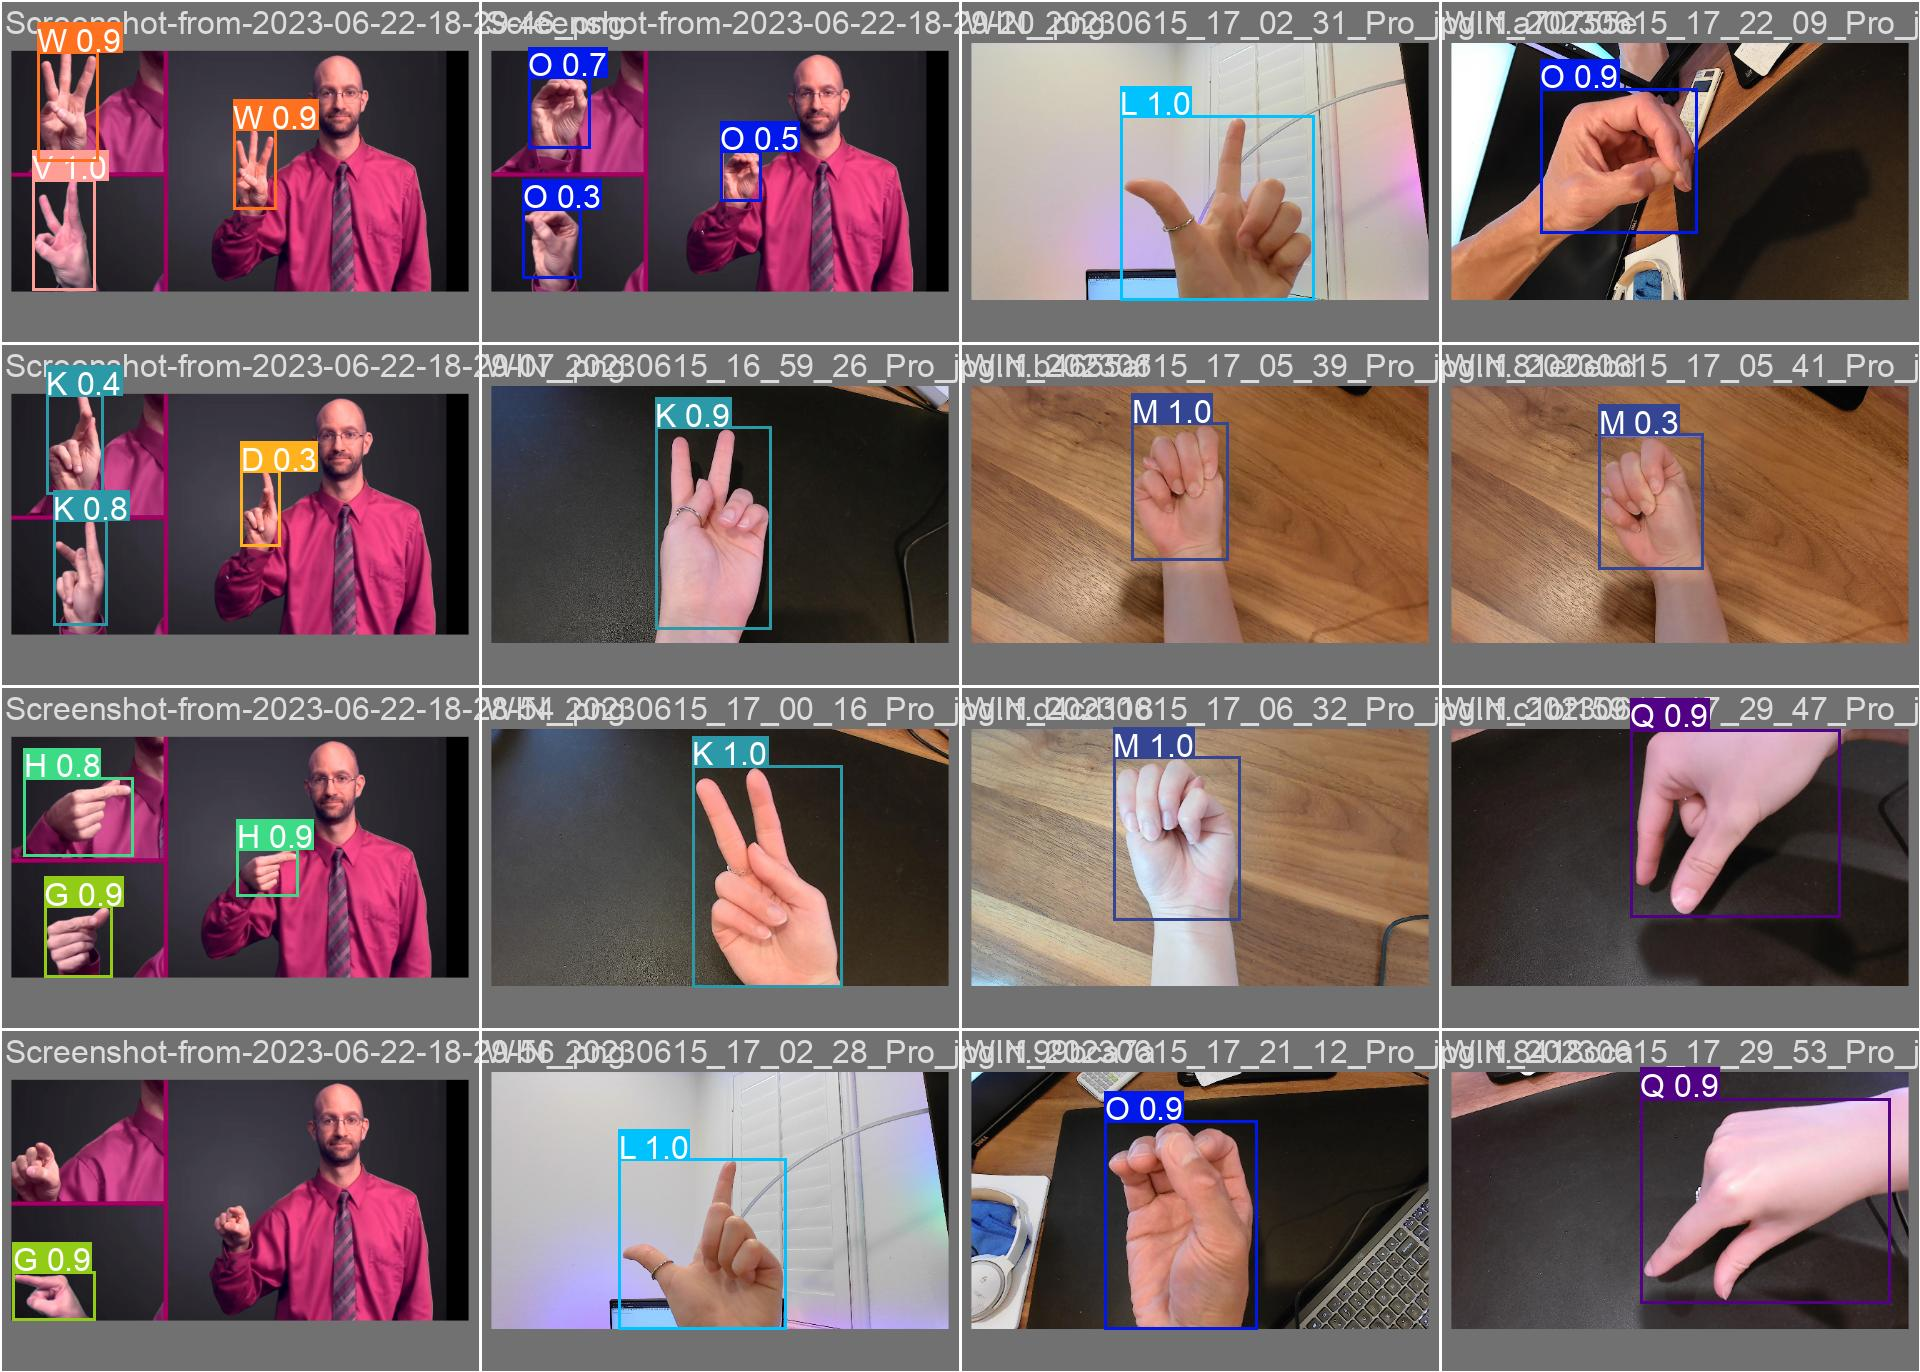

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [13]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/ASL-Project-17/valid/labels.cache... 1320 images, 60 backgrounds, 0 corrupt: 100% 1320/1320 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/83 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 83/83 [00:25<00:00,  3.27it/s]
                   all       1320       1270      0.933      0.922      0.954      0.808
                     A       1320         41      0.981      0.951      0.98

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs

image 1/789 /content/datasets/ASL-Project-17/test/images/00286722-eed6-4bd8-8971-a60ef904ef43-rgb_0000_png.rf.405252b3afe6fd6d88e548370334fd8a.jpg: 640x640 1 J, 16.4ms
image 2/789 /content/datasets/ASL-Project-17/test/images/0061926c-8289-47f4-8ffc-04cc8465ba28-rgb_0000_png.rf.5a989a8832ad6f29999e57839de759c9.jpg: 640x640 1 P, 16.4ms
image 3/789 /content/datasets/ASL-Project-17/test/images/0129b3ee-043b-4c0d-be06-57ceaabdcb59-rgb_0000_png.rf.9254d28382be523e12dfaf82c7ab2535.jpg: 640x640 (no detections), 16.3ms
image 4/789 /content/datasets/ASL-Project-17/test/images/01866cd6-d090-4538-b3e8-588a6a7da6c3-rgb_0000_png.rf.8850845ba76e6dd6358ad6fb19a7a3f7.jpg: 640x640 1 T, 16.3ms
image 5/789 /content/datasets/ASL-Project-17/test/images/02160606-8db5-44a8-9eef-db2a0230ff68-rgb_0000_png.rf.cd1e2357cfed9edf58d2028431f

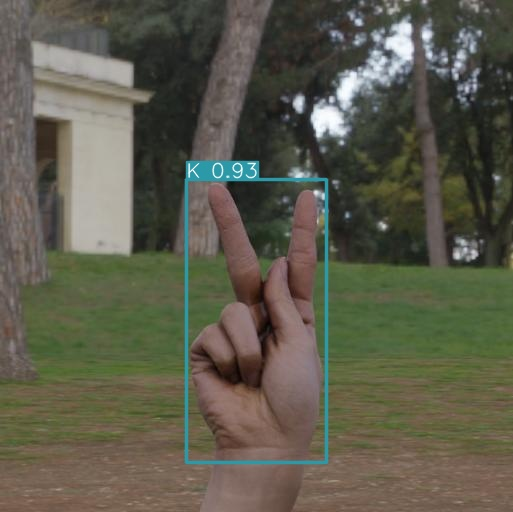

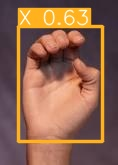

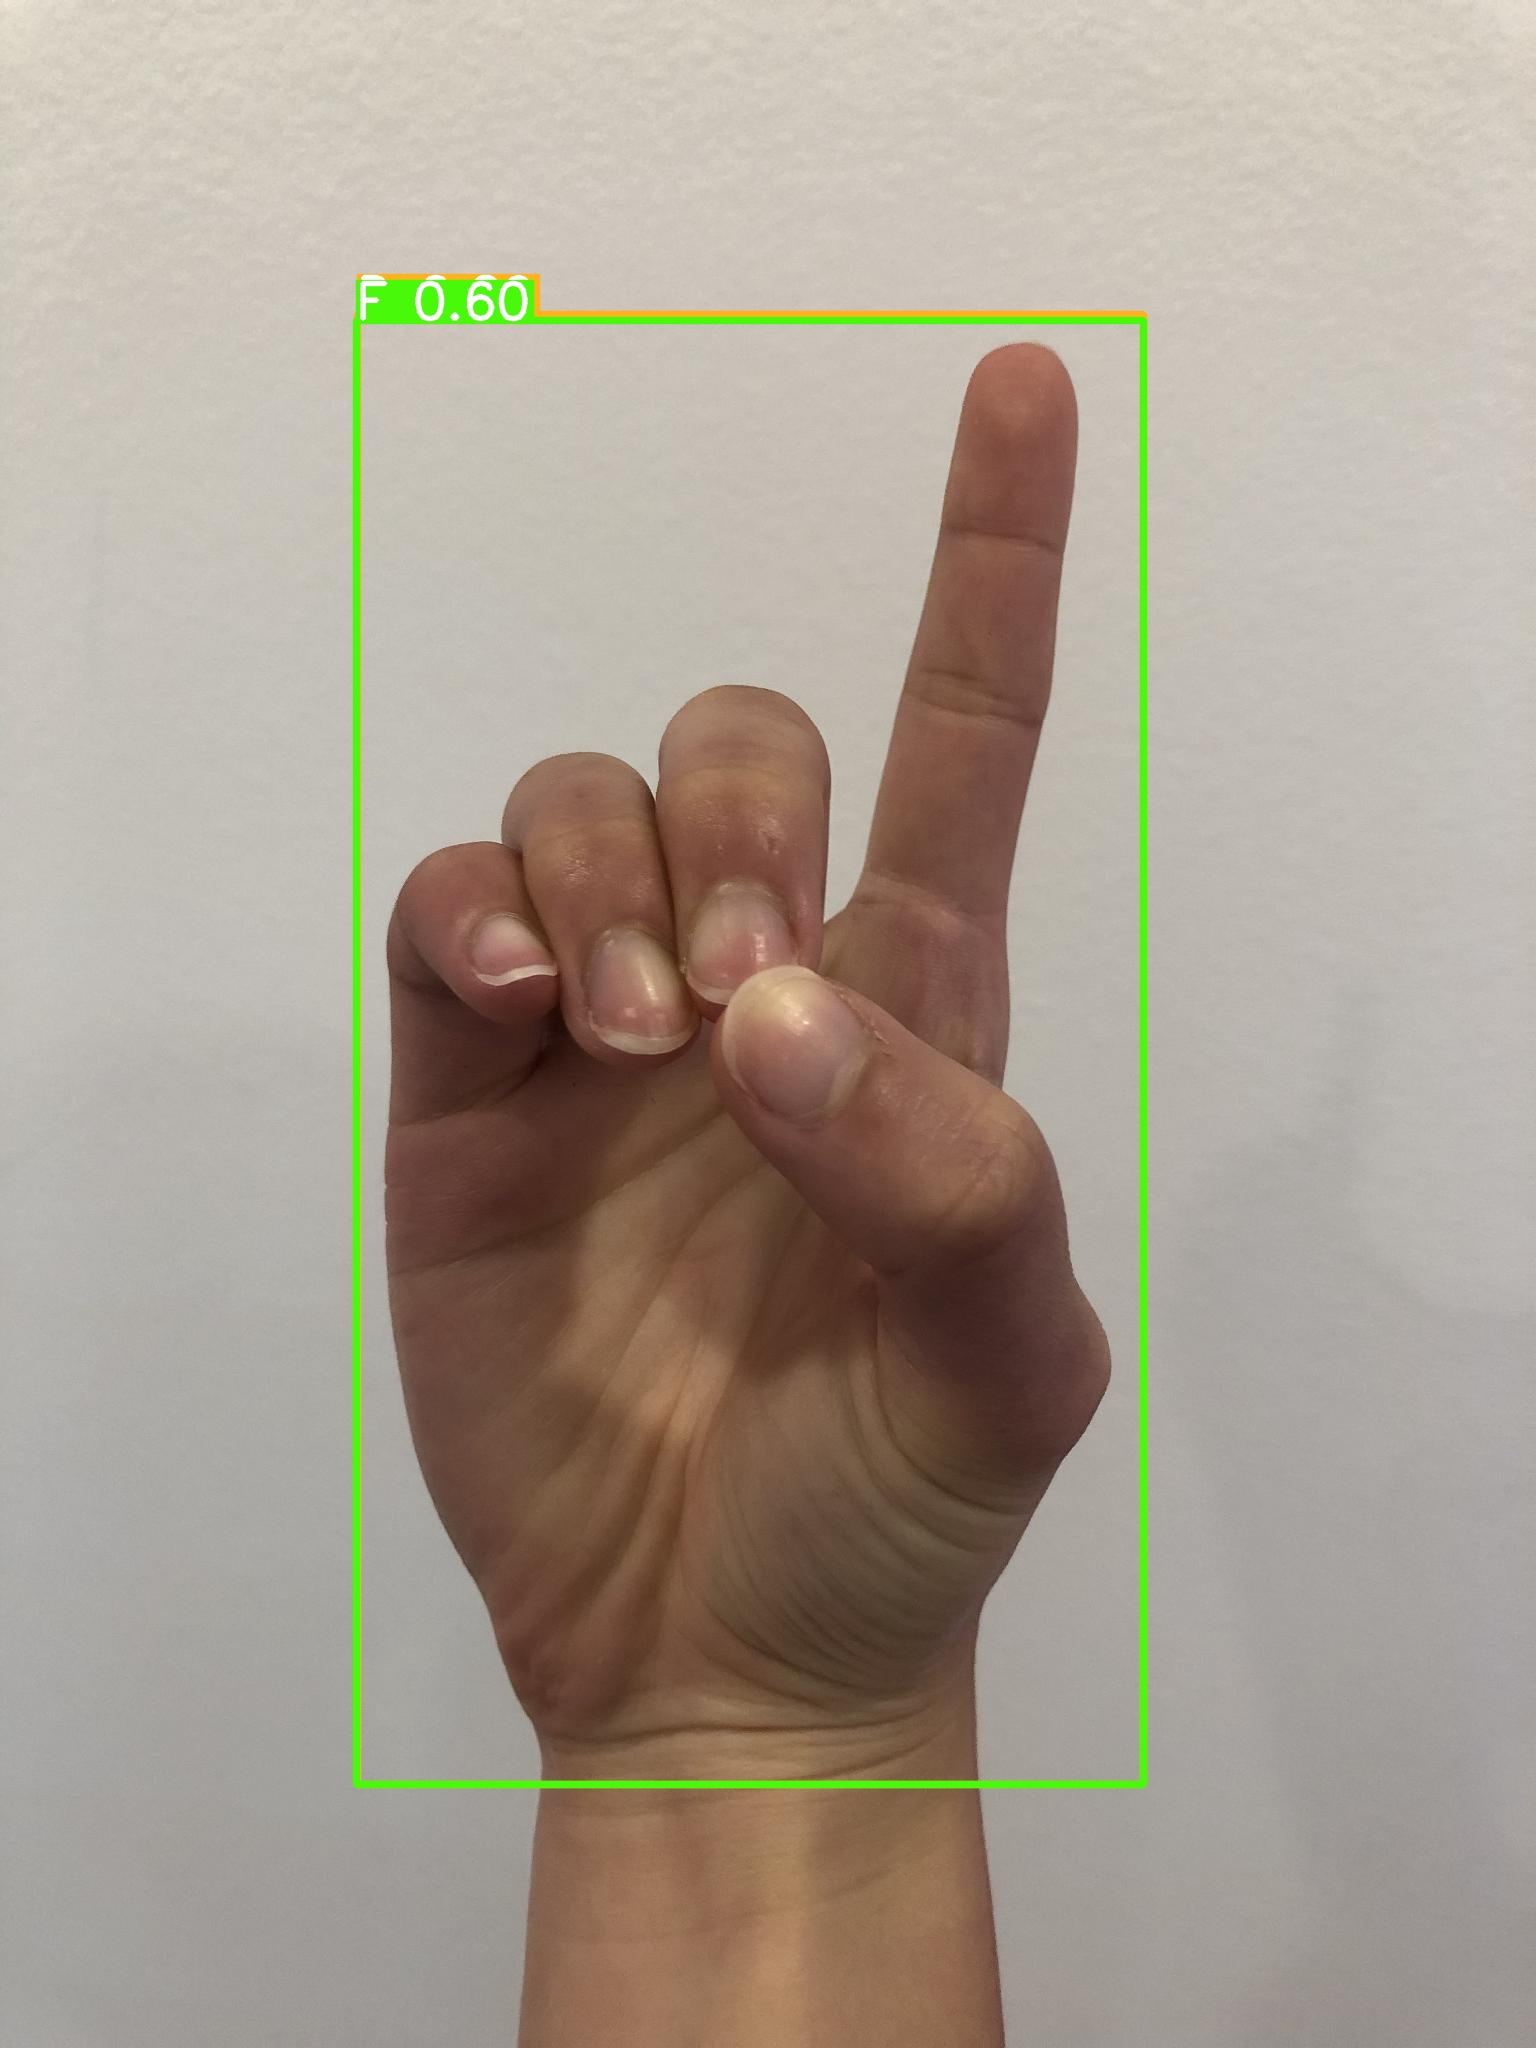

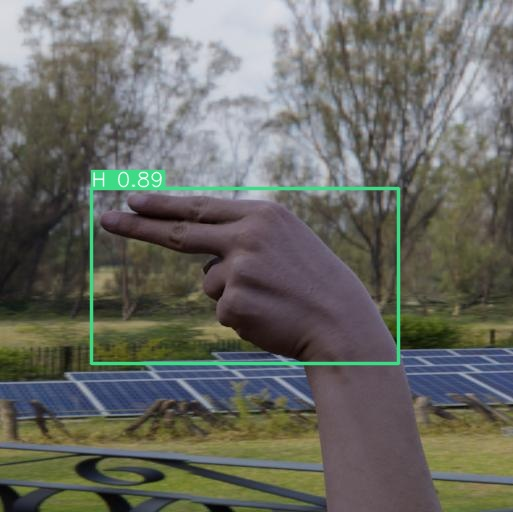

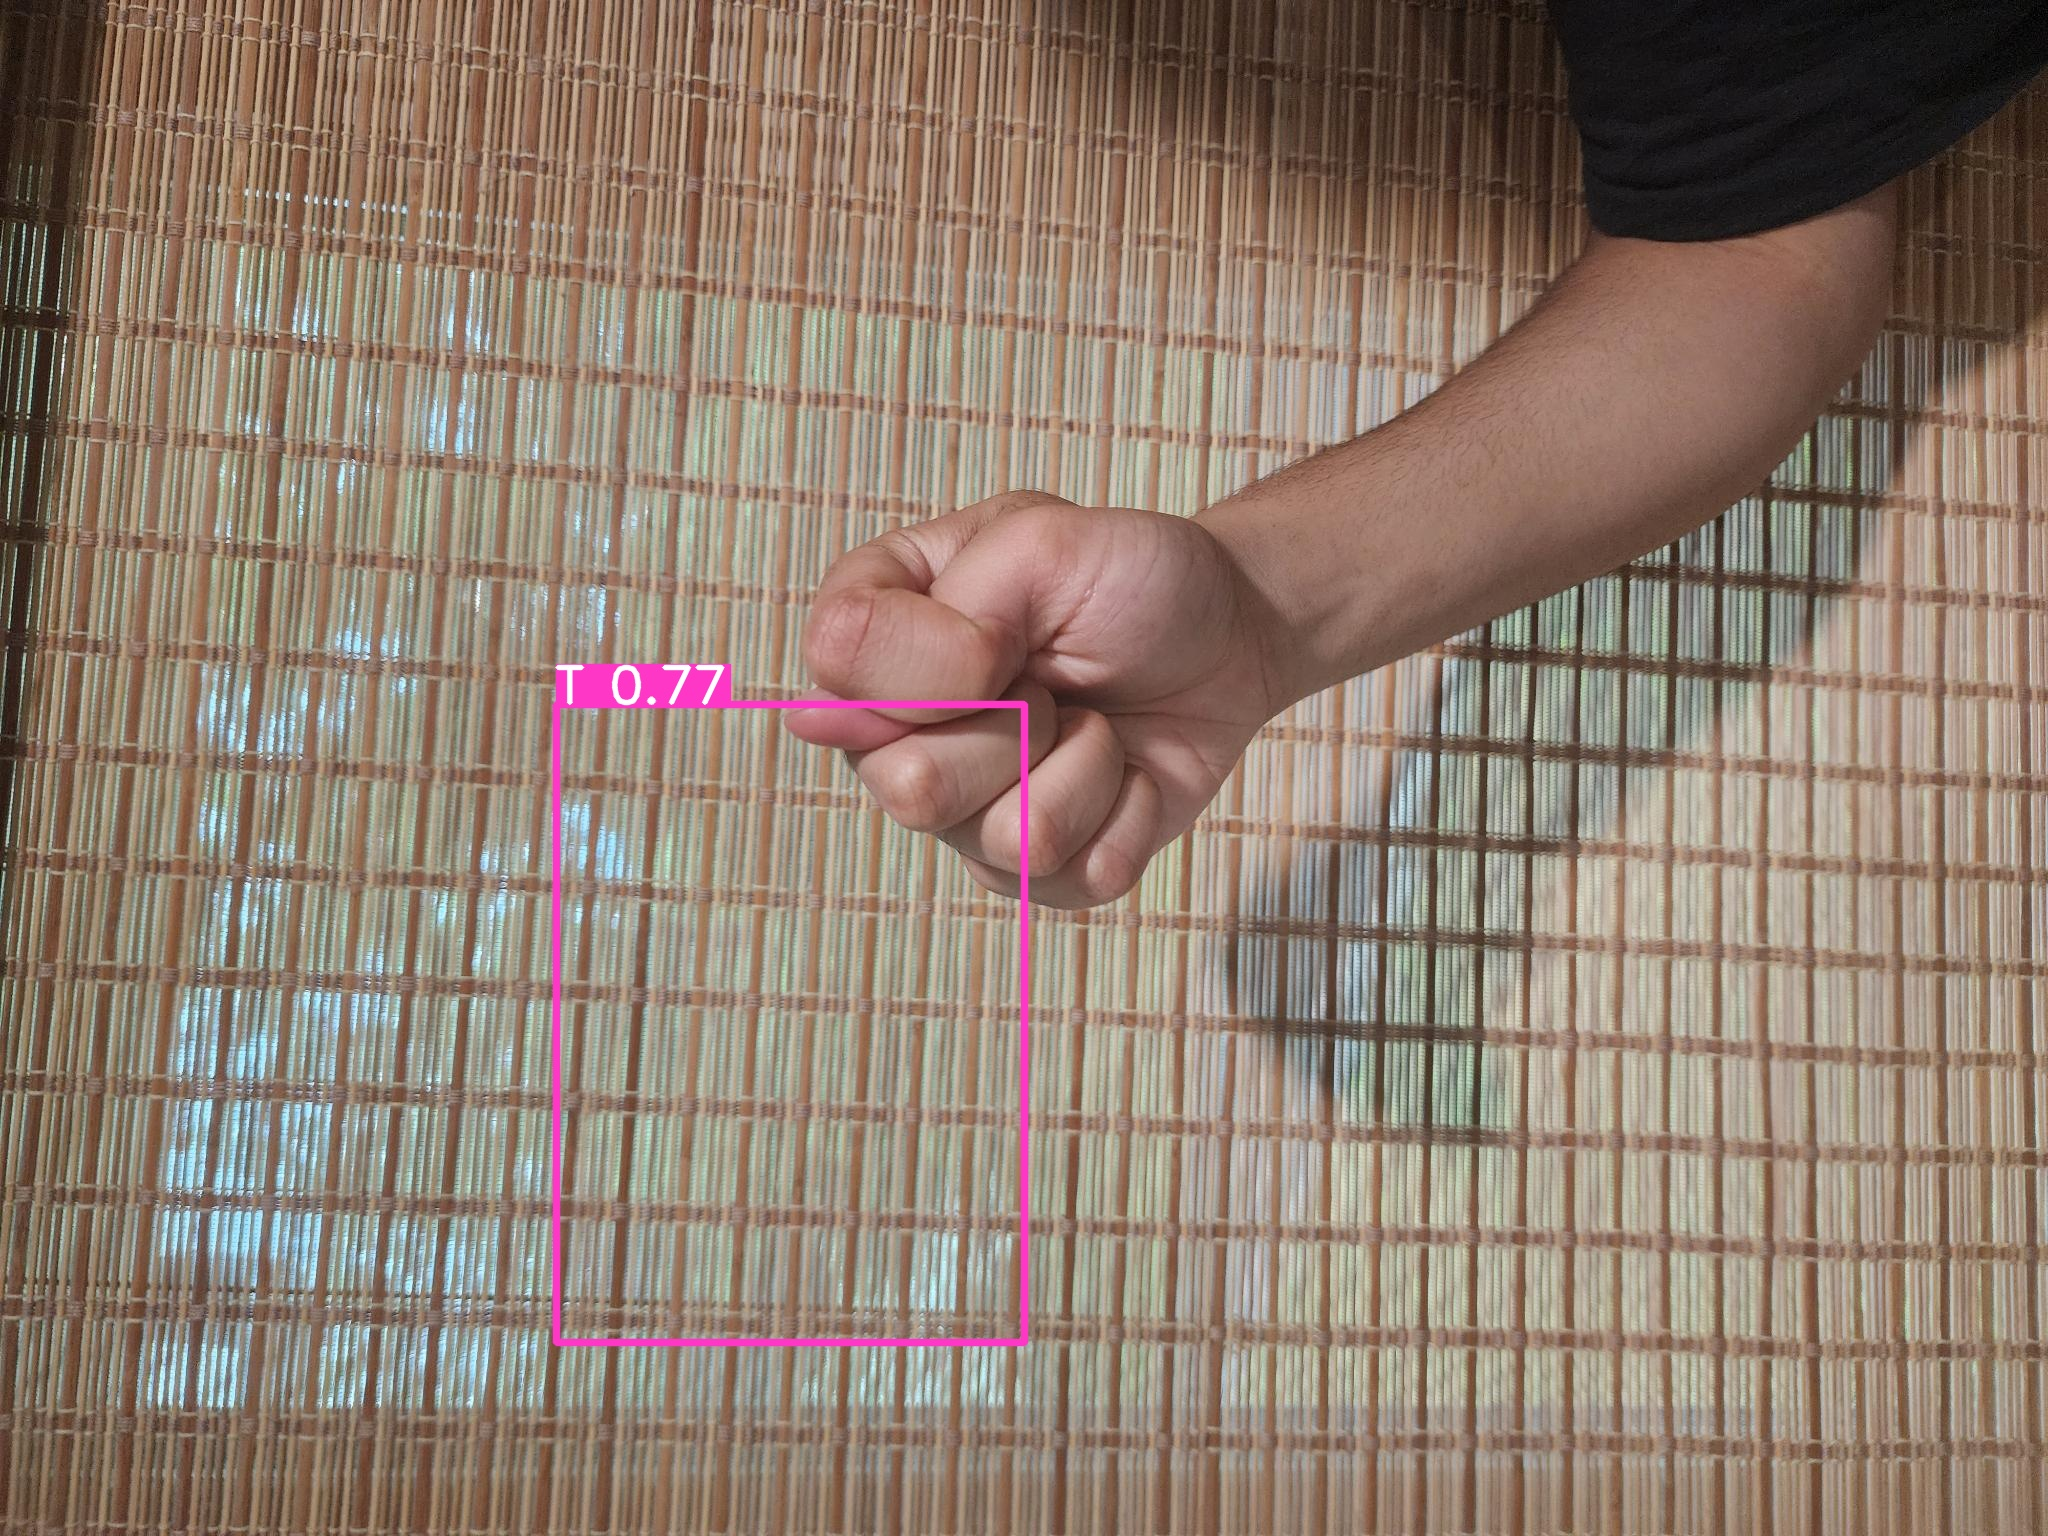

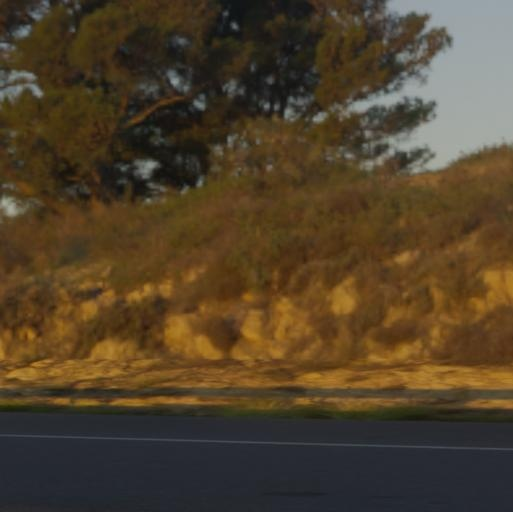

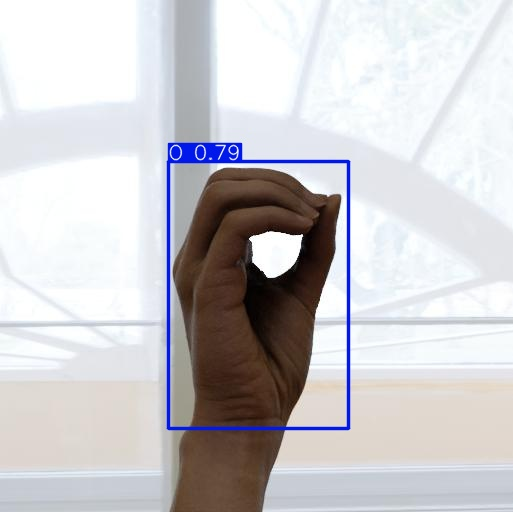

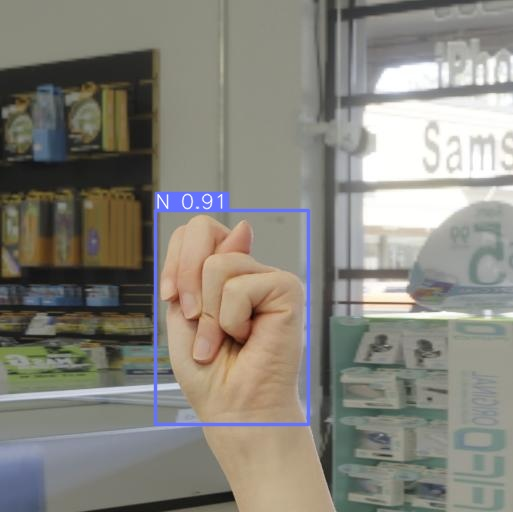

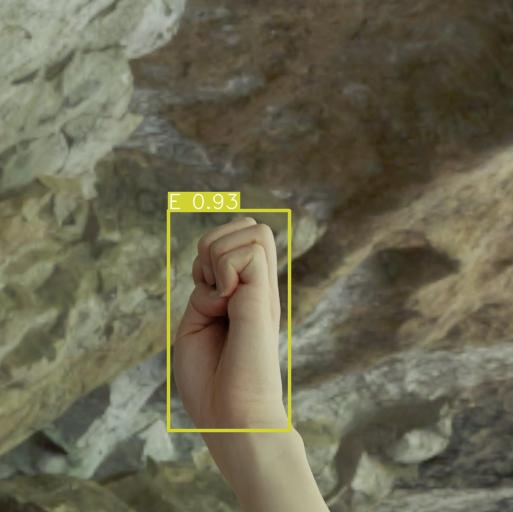

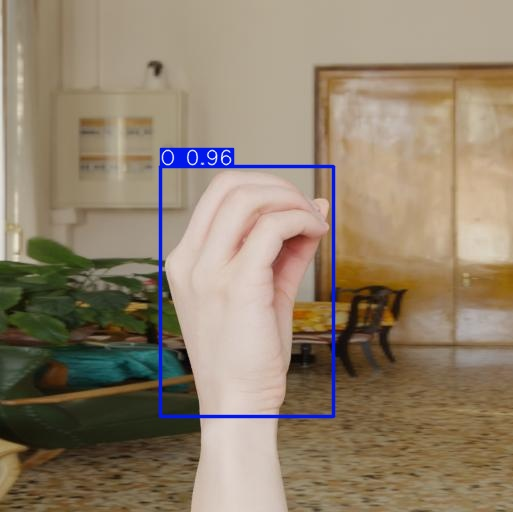

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [16]:
import shutil

# Укажите путь к папке, которую хотите скачать
folder_path = "/content/runs/detect"

# Укажите путь для архива
archive_path = "/content/runs/detect.zip"

# Создайте архив
shutil.make_archive("/content/runs/detect", 'zip', "/content/runs/detect")

# Скачайте архивированную папку
from google.colab import files
files.download(archive_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>